<a href="https://colab.research.google.com/github/MithunSR/Gradient_Descent_Tutorial/blob/main/Cost_Function_Mean_Squared_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to the Mean Squared Error (MSE) Cost Function for Linear Regression

Linear regression is a popular algorithm used for predicting continuous numerical values. It aims to find the best-fitting straight line that minimizes the difference between the predicted values and the actual values in the training data.

To achieve this, linear regression utilizes a cost function that quantifies the error between the predicted values and the actual values. One commonly used cost function is the Mean Squared Error (MSE).

**Mean Squared Error (MSE)**

The Mean Squared Error (MSE) is a measure of the average squared difference between the predicted values and the actual values. It is calculated by taking the sum of the squared differences and dividing it by the number of samples.

The MSE cost function for linear regression is defined as follows:

$MSE = (1 / (2m)) * ∑(h(x) - y)^2$

Where:



*   MSE: Mean Squared Error
*   m: Number of samples in the dataset
*   h(x): Hypothesis function, which represents the predicted values
*   y: Actual values

The MSE cost function aims to minimize the average squared difference between the predicted values and the actual values. By minimizing the MSE, we can find the optimal values for the model's parameters (coefficients) that provide the best fit to the data.


**Optimizing the Cost Function**

To optimize the MSE cost function, a common approach is to use gradient descent, an iterative optimization algorithm. Gradient descent iteratively updates the model's parameters by moving in the direction of steepest descent of the cost function. This process continues until a minimum (or close to it) of the cost function is reached.

By minimizing the MSE cost function using gradient descent, we can find the optimal parameter values (coefficients) that minimize the difference between the predicted values and the actual values, resulting in an accurate linear regression model.

In practice, the MSE cost function is widely used in linear regression tasks due to its simplicity and effectiveness in measuring the error between predicted and actual values.












#Develop Example Model

## Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing


##Loading the California housing dataset

In [2]:
data = fetch_california_housing()


##Extracting the features and target variable

In [3]:
X = data.data[:, 0]  # Use only one feature (average number of rooms per dwelling)
y = data.target


## Defining the hypothesis function

The hypothesis function represents the linear relationship between the input feature (x) and the target variable. It takes two parameters, theta0 and theta1, which are the coefficients of the linear regression model. The function returns the predicted value of the target variable based on the input and the model parameters.

In [4]:
def hypothesis(theta0, theta1, x):
    return theta0 + theta1 * x


##Defining the cost function (Mean Squared Error)

The cost function calculates the mean squared error (MSE) between the predicted values and the actual target values. It takes the model parameters (theta0 and theta1), the feature matrix (X), and the target variable (y) as inputs. The cost is computed by summing the squared differences between the predicted and actual values and dividing it by twice the number of samples (2 * m).

In [5]:
def cost_function(theta0, theta1, X, y):
    m = len(X)
    error = np.sum((hypothesis(theta0, theta1, X) - y) ** 2)
    return error / (2 * m)


##Defining the gradient descent function

The gradient descent function optimizes the model parameters (theta0 and theta1) using the gradient descent algorithm. It iteratively updates the parameters based on the gradient of the cost function to minimize the cost. The function takes the initial values of theta0 and theta1, the feature matrix X, the target variable y, the learning rate, and the number of iterations as inputs. It returns the optimized values of theta0 and theta1, along with a history of the cost values during the iterations.

In [6]:
def gradient_descent(theta0, theta1, X, y, learning_rate, num_iterations):
    m = len(X)
    history = []
    for _ in range(num_iterations):
        error = hypothesis(theta0, theta1, X) - y
        theta0 -= (learning_rate / m) * np.sum(error)
        theta1 -= (learning_rate / m) * np.sum(error * X)
        cost = cost_function(theta0, theta1, X, y)
        history.append(cost)
    return theta0, theta1, history


##Setting the initial values and hyperparameters

In this section, the initial values of theta0 and theta1, the learning rate, and the number of iterations are set. These values can be adjusted based on the problem and desired convergence.

In [7]:
initial_theta0 = 0
initial_theta1 = 0
learning_rate = 0.01
num_iterations = 1000


##Running gradient descent to optimize `theta0` and `theta1`

The gradient descent function is called to optimize the model parameters theta0 and theta1. The function returns the optimized values of theta0 and theta1, as well as the history of the cost values during the iterations.

In [8]:
theta0, theta1, cost_history = gradient_descent(initial_theta0, initial_theta1, X, y, learning_rate, num_iterations)


##Printing the optimized values of `theta0` and `theta1`



In [9]:
print('Optimized theta0:', theta0)
print('Optimized theta1:', theta1)


Optimized theta0: 0.3968328509928906
Optimized theta1: 0.42929964682709043


Optimized `theta0`: 0.3968328509928906
The optimized value of `theta0`  is approximately 0.397. In linear regression, `theta0` represents the y-intercept or the value of the target variable when the input feature (X) is zero. In this context, it indicates the estimated housing price when the average number of rooms per dwelling is zero. However, since this interpretation is not meaningful in this scenario, it's important to consider the context and domain knowledge when interpreting the values of the model parameters.

Optimized `theta1`: 0.42929964682709043
The optimized value of t`theta1` is approximately 0.429. In linear regression, `theta1` represents the coefficient or slope of the linear relationship between the input feature (X) and the target variable. In this case, it indicates the estimated change in housing price for a one-unit increase in the average number of rooms per dwelling. A positive `theta1` value suggests a positive relationship, indicating that as the average number of rooms per dwelling increases, the housing price is expected to increase.

##Visualizing the cost function:

In this section, a line plot is created to visualize the cost function over the iterations. The x-axis represents the number of iterations, and the y-axis represents the cost values. The resulting plot provides insight into how the cost decreases as the optimization progresses.

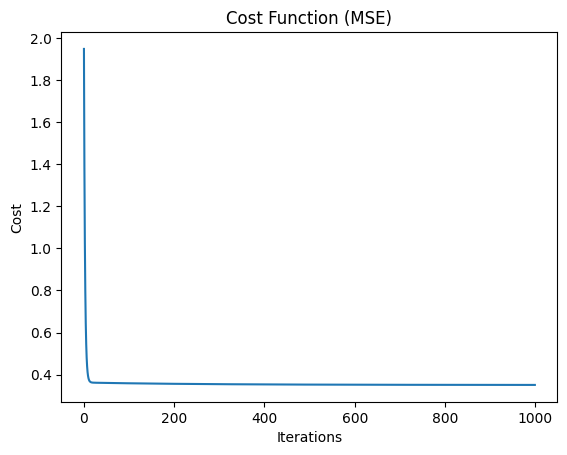

In [10]:
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function (MSE)')
plt.show()
